In [72]:
#To import all required modules for HW3
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import SpectralEmbedding
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import scipy.io
import numpy as np
from sklearn import metrics
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from glob import glob
import cv2

%matplotlib inline

(10, 400)
faces ids array shape (10,)


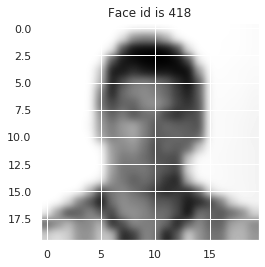

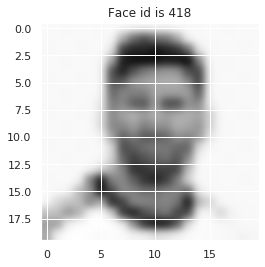

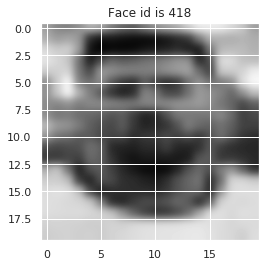

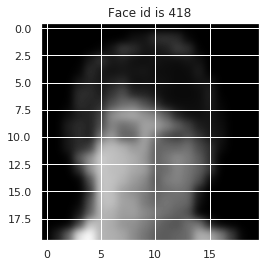

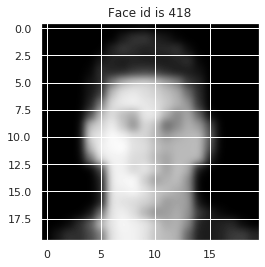

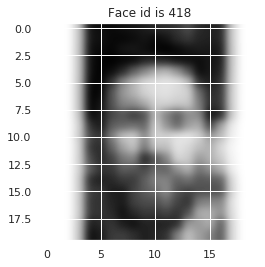

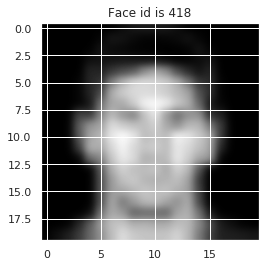

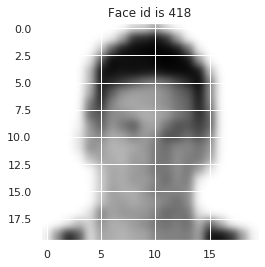

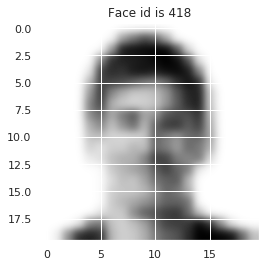

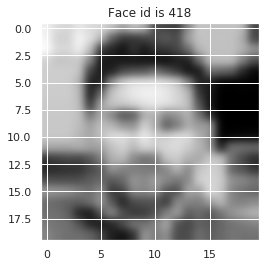

In [73]:
images_10 = [] 
images_10_ids = [418,418,418,418,418,418,418,418,418,418]
width = 20
height = 20
dim = (width, height)
#To loop through images in the dataset folder
for image in glob("dataset/messi/*.png"):
    #To read imag from dataset folder using cv2, cv2 reads images in BGR format
    imgBGR = cv2.imread(image)
    #To convert image into gray scale
    grayImage = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2GRAY)
    # resize image
    resized = cv2.resize(grayImage, dim, interpolation = cv2.INTER_AREA)
    #To save image in the images list to be used later by another functions
    data = np.asarray(resized.reshape(400,))
    images_10.append(data)
#To convert image list into an array
images_10_array = np.asarray(images_10)
print(images_10_array.shape)
faces_10_ids_array = np.asarray(images_10_ids)
print("faces ids array shape", faces_10_ids_array.shape)
#To show my 10 faces in the data set and it is label
for img in range(10):
    plt.imshow(images_10_array[img].reshape((20, 20)), cmap=plt.cm.gray, interpolation="gaussian")
    plt.title("Face id is " + str(faces_10_ids_array[img]), size=12)
    plt.show()


In [74]:
#To load and import data from the "faces-ids-n6680-m417-20x20.mat" mat file
#I used scipy library to load the data

dataset = scipy.io.loadmat('dataset/faces-ids-n6680-m417-20x20.mat')

#To get faces and faces id and store them in two different varaibles
faces = dataset['faces']

# Append 10 images to  faces dataset
faces_new = np.append(faces, images_10_array, axis=0)
print(faces_new[0].shape)
print(faces_new.shape)
faces_ids = dataset['ids']
faces_ids = np.append(faces_ids, faces_10_ids_array)
print(faces_ids.shape)
target = faces_ids
#convert data to float and scale values between 0 and 1
faces_new = faces_new.astype('float')

#scale data
faces_new /=255.0

(400,)
(6690, 400)
(6690,)


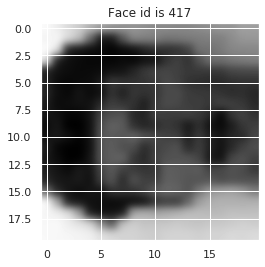

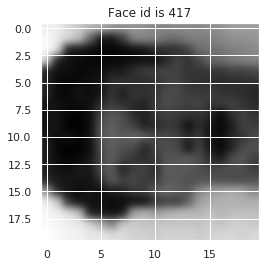

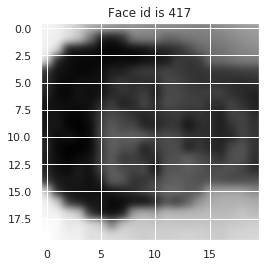

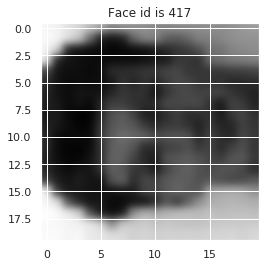

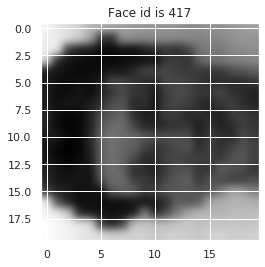

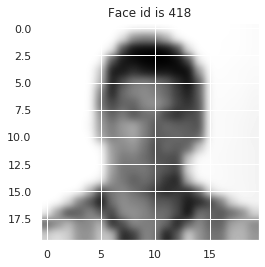

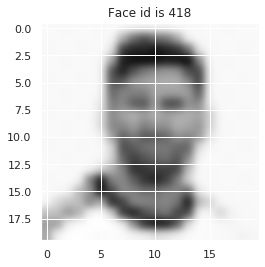

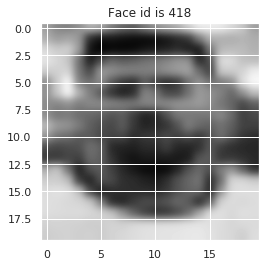

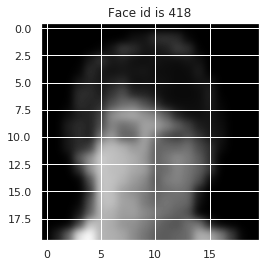

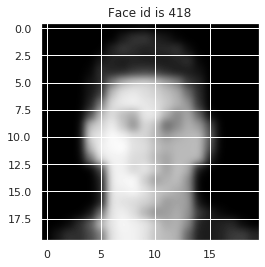

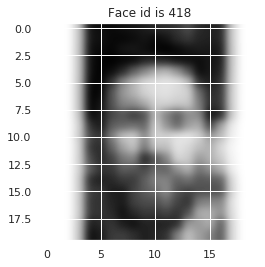

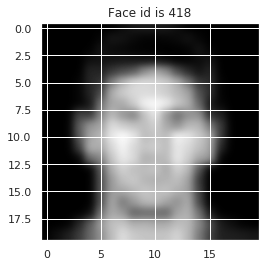

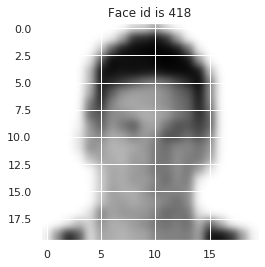

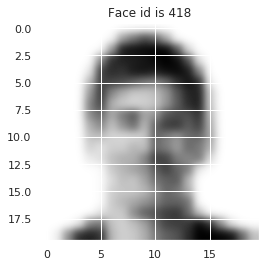

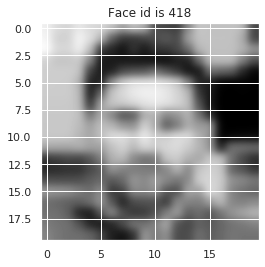

In [75]:
#To show first 10 faces in the data set and it is label
for i in range(6675,6690):
    
    plt.imshow(faces_new[i].reshape((20, 20)), cmap=plt.cm.gray, interpolation="gaussian")
    plt.title("Face id is " + str(faces_ids[i]), size=12)
    plt.show()

In [76]:
# To split data set into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(faces_new, faces_ids, test_size=0.10, random_state=42)


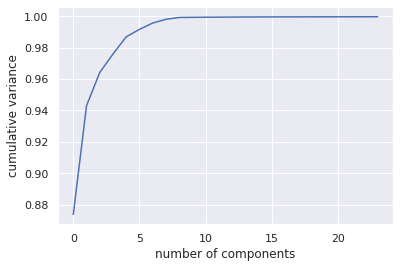

In [83]:
# Compute a PCA (eigenfaces) on the face dataset
n_components = 24
h = 20
w = 20

pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h, w))

# To Project the input data on the eigenfaces
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

#To compute Graph Laplacian embedding model after Eigenface projection (A0):
graph_Laplacian_embedding_model = SpectralEmbedding(n_components=n_components, affinity='nearest_neighbors', gamma=None, random_state=None, eigen_solver=None, n_neighbors=None, n_jobs=None).fit(X_train_pca)
X_train_glem = graph_Laplacian_embedding_model.fit_transform(X_train_pca)
X_test_glem = graph_Laplacian_embedding_model.fit_transform(X_test_pca)



#To plot cumulative variance corrsponding to the number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative variance')
plt.show()


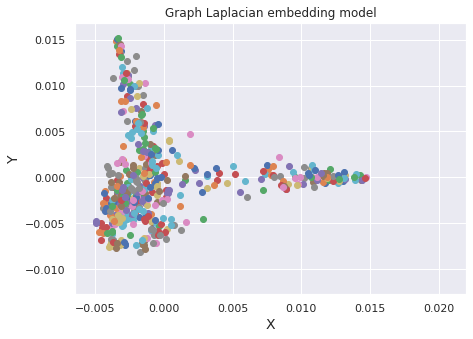

In [84]:
#To plot eigenface model 
first_xglem = X_test_glem[:500, :1]
second_yglem = X_test_glem[:500, 1:2]
faces_labels=y_test[:500]
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for label in np.unique(faces_labels):
 label_id=np.where(faces_labels==label)
 ax.scatter(first_xglem[label_id],second_yglem[label_id])
plt.xlabel("X",fontsize=14)
plt.ylabel("Y",fontsize=14)
plt.title("Graph Laplacian embedding model")
plt.show()


In [85]:
#To print the affinity matrix
print(graph_Laplacian_embedding_model._get_affinity_matrix(X_test_pca, y_test))



(0, 659)	0.5
  (0, 607)	0.5
  (0, 595)	0.5
  (0, 584)	0.5
  (0, 522)	0.5
  (0, 412)	0.5
  (0, 392)	0.5
  (0, 352)	0.5
  (0, 344)	0.5
  (0, 337)	0.5
  (0, 310)	0.5
  (0, 292)	0.5
  (0, 285)	0.5
  (0, 229)	0.5
  (0, 157)	0.5
  (0, 156)	0.5
  (0, 131)	0.5
  (0, 89)	0.5
  (0, 34)	0.5
  (0, 17)	0.5
  (0, 15)	0.5
  (0, 362)	0.5
  (0, 136)	1.0
  (0, 640)	0.5
  (0, 372)	0.5
  :	:
  (668, 4)	1.0
  (668, 437)	1.0
  (668, 643)	1.0
  (668, 401)	1.0
  (668, 348)	1.0
  (668, 353)	1.0
  (668, 507)	1.0
  (668, 334)	1.0
  (668, 647)	1.0
  (668, 494)	1.0
  (668, 564)	1.0
  (668, 125)	1.0
  (668, 307)	1.0
  (668, 594)	1.0
  (668, 171)	1.0
  (668, 276)	1.0
  (668, 508)	1.0
  (668, 580)	1.0
  (668, 149)	1.0
  (668, 474)	1.0
  (668, 211)	1.0
  (668, 536)	1.0
  (668, 475)	1.0
  (668, 321)	1.0
  (668, 668)	1.0
